In [1]:
#pip install simpy

Taxa de desistência: 6.26%
Média de chegadas na fila: 1.04 usuários
Média de atendimentos: 1.14 usuários


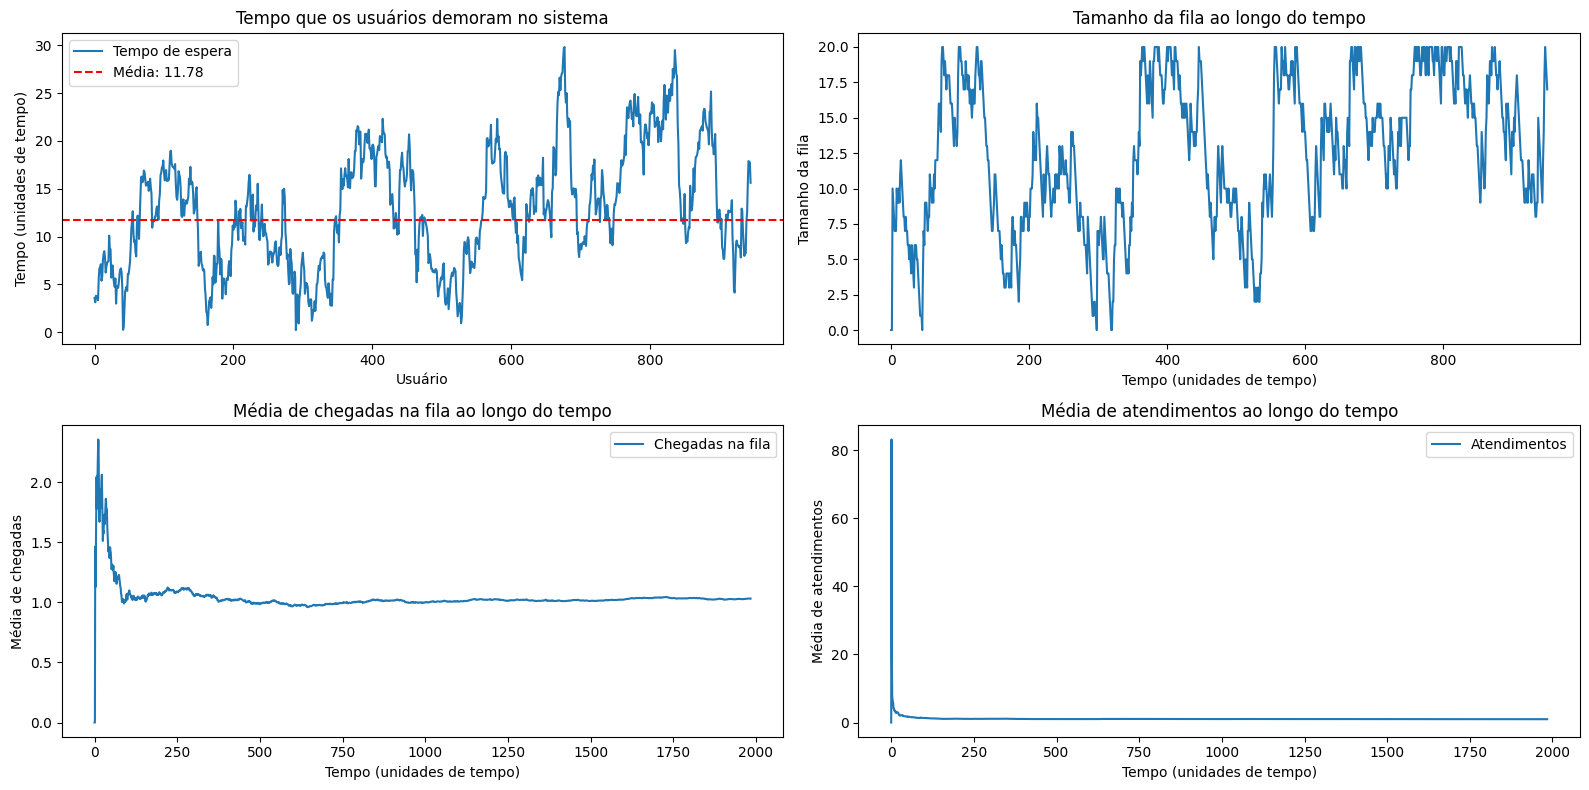

In [2]:
# VIDEO APRESENTAÇÃO
# https://www.youtube.com/watch?v=VodyqF2VrQ8

import numpy as np
import matplotlib.pyplot as plt

def simulate_mm_c_queue(arrival_rate, service_rate, num_servers, max_queue_size, simulation_time):
    
    clock = 0
    arrival_clock = np.random.exponential(1/arrival_rate)
    service_clocks = np.zeros(num_servers)
    queue = []
    wait_times = []
    queue_sizes = []
    abandonment_count = 0
    
    total_arrivals = 0
    total_services = 0
    total_wait_time = 0
    total_service_time = 0
    
    arrival_rate_mean = []
    service_rate_mean = []
    
    while clock < simulation_time:
        if arrival_clock < min(service_clocks):
            clock = arrival_clock
            total_arrivals += 1
            if len(queue) < max_queue_size:
                queue.append(clock)
            else:
                abandonment_count += 1
        else:
            clock = min(service_clocks)
            queue_sizes.append(len(queue))
            if len(queue) > 0:
                wait_time = clock - queue.pop(0)
                wait_times.append(wait_time)
                service_time = np.random.exponential(1/service_rate)
                total_services += 1
                total_wait_time += wait_time
                total_service_time += service_time
                service_clocks[np.argmin(service_clocks)] += service_time
            else:
                for i in range(num_servers):
                    service_time = np.random.exponential(1/service_rate)
                    total_services += 1
                    total_service_time += service_time
                    service_clocks[i] += service_time
        
        arrival_rate_mean.append(total_arrivals / clock) if clock != 0 else arrival_rate_mean.append(0)
        service_rate_mean.append(total_services / clock) if clock != 0 else service_rate_mean.append(0)

        
        if clock >= arrival_clock:
            arrival_clock += np.random.exponential(1/arrival_rate)
    
    abandonment_rate = abandonment_count / (total_arrivals + abandonment_count)
    wait_time_mean = total_wait_time / total_arrivals
    service_time_mean = total_service_time / total_services
    
    return wait_times, queue_sizes, abandonment_rate, arrival_rate_mean, service_rate_mean, wait_time_mean, service_time_mean

def plot_simulation_results(wait_times, queue_sizes, abandonment_rate, arrival_rate_mean, service_rate_mean, wait_time_mean, service_time_mean):
    
    plt.figure(figsize=(16, 8))

    plt.subplot(2, 2, 1)
    plt.plot(wait_times, label='Tempo de espera')
    plt.axhline(y=wait_time_mean, color='r', linestyle='--', label=f'Média: {wait_time_mean:.2f}')
    plt.title('Tempo que os usuários demoram no sistema')
    plt.xlabel('Usuário')
    plt.ylabel('Tempo (unidades de tempo)')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(queue_sizes, label='Tamanho da fila')
    plt.title('Tamanho da fila ao longo do tempo')
    plt.xlabel('Tempo (unidades de tempo)')
    plt.ylabel('Tamanho da fila')
    
    plt.subplot(2, 2, 3)
    plt.plot(arrival_rate_mean, label='Chegadas na fila')
    plt.title('Média de chegadas na fila ao longo do tempo')
    plt.xlabel('Tempo (unidades de tempo)')
    plt.ylabel('Média de chegadas')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(service_rate_mean, label='Atendimentos')
    plt.title('Média de atendimentos ao longo do tempo')
    plt.xlabel('Tempo (unidades de tempo)')
    plt.ylabel('Média de atendimentos')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Parâmetros da simulação
arrival_rate = 1  # Taxa de chegada de usuários
service_rate = 0.15  # Taxa de serviço 
num_servers = 7  # Número de caixas disponíveis
max_queue_size = 20  # Tamanho máximo da fila antes de ocorrer desistências
simulation_time = 1000  # Tempo total da simulação em unidades de tempo

# Realiza a simulação
wait_times, queue_sizes, abandonment_rate, arrival_rate_mean, service_rate_mean, wait_time_mean, service_time_mean = simulate_mm_c_queue(arrival_rate, service_rate, num_servers, max_queue_size, simulation_time)
# Calculate averages
average_arrival_rate = sum(arrival_rate_mean) / len(arrival_rate_mean) if arrival_rate_mean else 0
average_service_rate = sum(service_rate_mean) / len(service_rate_mean) if service_rate_mean else 0

# Print averages
print(f'Taxa de desistência: {abandonment_rate:.2%}')
print(f'Média de chegadas na fila: {average_arrival_rate:.2f} usuários')
print(f'Média de atendimentos: {average_service_rate:.2f} usuários')


# Plota os resultados
plot_simulation_results(wait_times, queue_sizes, abandonment_rate, arrival_rate_mean, service_rate_mean, wait_time_mean, service_time_mean)